<a href="https://colab.research.google.com/github/dincker/PLN/blob/master/Model_LDA_Spanish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ds1.zip to ds1 (1).zip


In [0]:
import io
import json
from zipfile import ZipFile
lista = []

with ZipFile(io.BytesIO(uploaded['ds1.zip']), 'r') as zipObj:
   # Get a list of all archived file names from the zip
   listOfFileNames = zipObj.namelist()
   # Iterate over the file names
   for fileName in listOfFileNames:
     # Check filename endswith csv
     #print(fileName)
     if fileName.endswith('.json'):
       with zipObj.open(fileName) as file_text:
         #zipObj.extract(fileName, 'temp_csv')
         d = file_text.read()
         d = json.loads(d)
         #print(d['text'])
         lista.append(d['text'])  
         # Extract a single file from zip

In [0]:
df = pd.DataFrame(lista,columns=['News'])

In [25]:
df.head()

,News
0,Garantía 12 meses (1 año) Comentarios del anun...
1,Cinco militares mexicanos murieron y 10 result...
2,EL NACIONAL WEB 1 de octubre 2016 - 03:58 pm L...
3,ACTUALIZA 3-Clinton busca mantener a Trump a l...
4,La pregunta no puede contener URLs Tu nombre T...


Tokenizacion (lemma + tokenize + non_words - spacy, stemmer nltk)

In [27]:
#Cargando modelo en español de spacy
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
from nltk import SnowballStemmer
def normalize(text):
  #Tokenice spacy
  doc = nlp(text)
  #Lemmatizacion spacy, normalice
  words = [t.lemma_ for t in doc if not t.is_punct | t.is_stop]
  #Normalice
  lexical_tokens = [t.lower() for t in words if len(t) > 3 and t.isalpha()]
  #Stemmer
  spanishstemmer = SnowballStemmer('spanish')
  stema = [spanishstemmer.stem(token) for token in lexical_tokens]
  return stema


Tokenizacion (lemma + tokenize - nltk , non_words - string, stemmer nltk)

---



In [40]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
from nltk import word_tokenize
stemmer = SnowballStemmer('spanish')
#normalice
non_words = list(punctuation)
non_words.extend(['¿','¡'])
non_words.extend(map(str,range(10)))
def stem_tokens(tokens, stemmer):
    stemmed = []
    #Stemmer
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
def tokenize(text):
  #Tokenice and normalice
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)
    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems


In [53]:
print(tokenize(df['News'][0]))
print(normalize(df['News'][0]))

['garant', 'mes', 'año', 'comentari', 'del', 'anunci', 'vehicul', 'en', 'buen', 'estad', 'manten', 'al', 'dia', 'libr', 'de', 'revision', 'motor', 'di', 'cv', 'plaz', 'lun', 'tint', 'bol', 'de', 'remolqu', 'estrib', 'lateral', 'defens', 'delanter', 'tod', 'homolog', 'kilometr', 'demostr', 'garanti', 'un', 'año', 'se', 'acept', 'vehicul', 'com', 'part', 'de', 'pag', 'iruri', 'motor', 'desd', 'especial', 'en', 'x', 'gran', 'varied', 'de', 'vehicul', 'compr', 'su', 'x', 'equip', 'extra']
['garant', 'mes', 'comentari', 'anunci', 'vehicul', 'manten', 'libr', 'revision', 'motor', 'plaz', 'lun', 'tint', 'bol', 'remolc', 'estrib', 'lateral', 'defens', 'delanter', 'homolog', 'kilometr', 'demostr', 'garanti', 'acept', 'vehicul', 'pag', 'iruri', 'motor', 'especial', 'varied', 'vehicul', 'compr', 'equip', 'extra']


Stop Words

In [87]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
len(spanish_stopwords)

313

In [59]:
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=5dc8523e011288e0a9b98fbb25473bd37fcac55b3374c6ad62b8a187e2e04d7c
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [85]:
from stop_words import get_stop_words
stop_words_sw = get_stop_words('spanish')
len(stop_words_sw)

308

In [86]:
from spacy.lang.es.stop_words import STOP_WORDS
len(STOP_WORDS)

551

In [0]:
vectorizer = CountVectorizer(
                analyzer = 'word',
                tokenizer = normalize,
                lowercase = True,
                #stop_words = spanish_stopwords) #NLTK
                #stop_words = stop_words_sw) #stop-words
                stop_words = STOP_WORDS) #Spacy


In [0]:
res = vectorizer.fit_transform(df['News'])

Spacy

In [71]:
len(res.get_feature_names())

15136

Stop-words

In [78]:
len(res.get_feature_names())

15168

NLTK

In [84]:
len(res.get_feature_names())

15168

GridSearch

In [0]:
#DEFINIENDO LOS PARAMETROS DE BUSQUEDA
search_params = {'n_components':[5,10,15],'learning_decay':[.5,.7,.9],'n_jobs':[-1]}

In [0]:
#INICIANDO EL MODELO
from sklearn.decomposition import LatentDirichletAllocation
ldaa= LatentDirichletAllocation()

In [0]:
from sklearn.model_selection import GridSearchCV
#INICIANDO LA CLASE GRID SEARCH
model = GridSearchCV(ldaa,param_grid=search_params)

In [97]:
#HACER UNA BUSQUEDA DE CUADRIC
model.fit(res)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [0]:
#Mejor modelo
best_lda_model=model.best_estimator_

In [99]:
#Paramtros modelo
print("Best Model's Params: ",model.best_params_)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5, 'n_jobs': -1}


In [100]:
#REgistro ed puntaje de probabilidad
print("Mejor puntaje de probabilidad: ",model.best_score_)

Mejor puntaje de probabilidad:  -313057.1341263197


In [102]:
#Perplejidad
print("Modelo prerplejidad: ", best_lda_model.perplexity(res))

Modelo prerplejidad:  4548.318621226251


In [103]:
#for gscore in model.cv_results_:
#    print(gscore)
lista=[]
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
for gscore,params in zip(gscore,params): 
    if params==0.5:
        lista.append(gscore)
        
print(lista)

[-313057.1341263197, -348640.29941275826, -376853.67510824837]


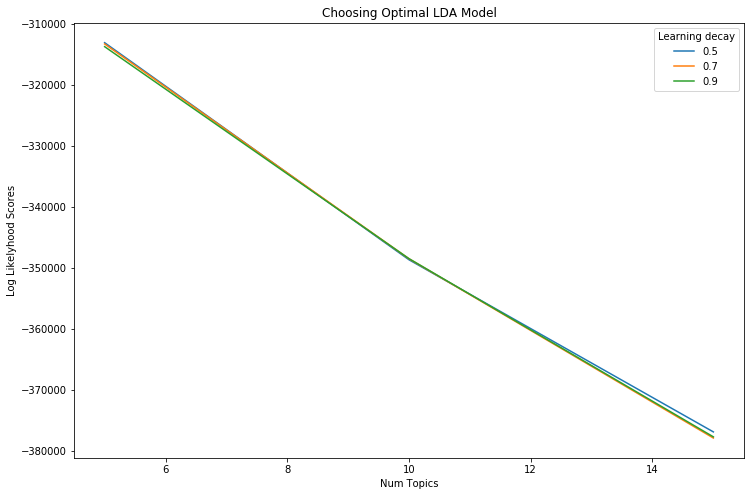

In [104]:
import matplotlib.pyplot as plt
# Obtenga probabilidades de registro de la salida de búsqueda de cuadrícula
n_topics=[5,10,15]
#model.cv_results_['mean_test_score'],model.cv_results_['param_learning_decay']
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
Log_likelyoods_5=[]
Log_likelyoods_7=[]
Log_likelyoods_9=[]
for gscore,params in zip(gscore,params):
    if params==0.5:
        Log_likelyoods_5.append(round(gscore))
    if params==0.7:
        Log_likelyoods_7.append(round(gscore))
    if params==0.9:
        Log_likelyoods_9.append(round(gscore))

#Log_likelyoods_5 = [round (mean) for mean,param in zip(means,params) if params==0.5]
#Log_likelyoods_7 = [round (mean) for mean,param in zip(means,params) if params==0.7]
#Log_likelyoods_9 = [round (mean) for mean,param in zip(means,params) if params==0.9]
#Log_likelyoods_5 = [for gscore,param in zip(gscore,params): if params==0.5: round(gscore)]
#Log_likelyoods_7 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.7]
#Log_likelyoods_9 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, Log_likelyoods_5, label='0.5')
plt.plot(n_topics, Log_likelyoods_7, label='0.7')
plt.plot(n_topics, Log_likelyoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()


Tema dominante en el texto

In [0]:
#Crear documentos- Matriz de temas
lda_output = best_lda_model.transform(res)

In [107]:
best_lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [0]:
#Nombre de columnas
topicnames = []
for i in range(int(best_lda_model.n_components)):
    name='Topic'+str(i)
    topicnames.append(name)

In [0]:
#nombre de indices
docnames = []
#for i in range(len(cv.get_feature_names())):
for i in range(1000):
    docnames.append('Doc'+str(i))

In [0]:
import numpy as np
#Creando un dataframe en pandas
df_document_topic=pd.DataFrame(np.round(lda_output,2),columns=topicnames,index=docnames)

In [0]:
# Obtener tema dominante para cada documento
dominant_topic=np.argmax(df_document_topic.values,axis=1)
df_document_topic['dominant_topic']=dominant_topic

In [0]:
#Estilando
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

In [115]:
#Aplicando estilo
df_document_topic=df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.01,0.01,0.01,0.98,0.01,3
Doc1,0.42,0,0,0,0.58,4
Doc2,0,0,0.07,0,0.93,4
Doc3,0.37,0.2,0,0.43,0,3
Doc4,0.01,0.01,0.01,0.96,0.01,3
Doc5,0,0,0,0.99,0,3
Doc6,0.97,0,0,0,0.02,0
Doc7,0.02,0.72,0,0.25,0,1
Doc8,0,0,0,0,1,4
Doc9,0.35,0.65,0,0,0,1


Distribucion de temas en el texto

In [0]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

In [0]:
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

In [121]:
# View
df_topic_keywords.head()

,aaalllooohhhaa,aacc,aalt,aaron,abad,abaj,abal,abalanz,abander,abandon,abanic,abar,abarc,abarrot,abast,abastec,abat,abccordob,abdal,abdel,abderrahm,abdo,abdom,abdominal,abdominoplasti,abdon,abeb,abeci,abel,abelard,aberr,abert,abertis,abet,abiert,abigail,abiot,abism,abismal,abneg,...,ñeng,ñiguez,ölünc,østberg,ýspany,ăąre,ăşltim,ăşnic,škod,ťalgun,ťbobby,ťborn,ťcaf,ťcuart,ťhol,ťlos,ťmemec,ťnew,ťorbit,ťosti,ťser,ťsnowdenť,ťthe,ťtod,ťvuelv,żcom,żcon,żconsider,żconsult,żer,żles,żlos,żpor,żqu,żresult,żson,żtus,żťla,ſeptiembr,йstos
Topic0,0.200000,0.2,0.200000,3.993990,3.187471,6.188587,1.199998,1.191325,0.201763,14.952723,0.200000,0.200001,0.202900,1.199999,0.200001,1.172334,1.463672,0.218553,0.200000,0.200000,2.022998,0.200000,2.196154,0.200939,0.200000,0.200001,0.200000,1.195436,1.199948,0.200000,0.200172,1.199997,3.198933,0.211825,3.199453,0.2,0.200000,2.199963,0.200109,0.201674,...,0.2,0.2,0.200000,2.199999,1.199992,0.200000,0.200001,0.200000,1.199999,0.200000,0.2,0.2,0.2,0.200000,0.2,0.2,0.200000,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.200001,0.200000
Topic1,0.200000,0.2,0.200000,0.200315,0.200000,2.029693,0.200000,0.208672,0.200000,19.628490,0.200000,2.196518,6.425298,0.200000,1.199996,0.228435,0.200007,0.200001,0.200329,0.202046,0.200001,0.200329,0.200001,0.210880,0.200000,0.225863,4.199998,0.200000,0.200000,0.200000,0.200864,0.200000,0.201065,0.200609,0.200000,0.2,0.200314,0.200000,2.196751,1.196969,...,0.2,0.2,0.200000,0.200000,0.200001,1.187459,2.197045,1.198899,0.200000,1.199998,0.2,0.2,0.2,3.199998,0.2,0.2,1.199998,0.2,3.199998,0.2,0.2,0.2,0.2,0.2,0.2,1.199968,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.200001,0.200504
Topic2,0.200000,2.2,0.200000,0.200001,0.200000,1.211167,0.200001,0.200001,0.200000,0.925776,2.199999,0.210590,0.200280,0.200000,0.200001,1.199227,0.200001,0.200002,0.200001,1.195745,0.200003,0.200001,1.200224,0.200001,0.200000,0.200002,0.200001,0.200000,1.200051,0.200000,0.200000,0.200001,0.200001,0.200001,0.200000,0.2,0.200000,1.200036,0.200000,0.200000,...,0.2,1.2,1.199999,0.200000,0.200002,0.212538,0.200950,0.201099,0.200000,0.200001,0.2,0.2,0.2,0.200001,0.2,0.2,0.200001,0.2,0.200001,0.2,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,1.199995,0.200000
Topic3,1.199999,0.2,0.200000,0.200002,0.212528,0.200546,0.200001,0.200001,0.200000,1.264787,0.200000,1.191743,1.971521,0.200000,0.200001,0.200002,4.200312,1.181267,0.200001,0.200000,0.200003,0.200001,0.200002,1.199825,0.200000,0.200002,0.200001,0.204563,0.200001,0.200000,0.200000,0.200001,0.200001,1.170791,0.200000,1.2,0.200000,0.200001,0.203139,0.200000,...,0.2,0.2,0.200000,0.200000,0.200003,0.200001,0.200001,0.200001,0.200000,0.200001,0.2,0.2,0.2,0.200001,0.2,0.2,0.200001,0.2,0.200001,0.2,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.200002,1.198996
Topic4,0.200000,0.2,1.199999,1.405692,0.200000,4.370007,0.200000,0.200001,1.198236,20.228224,0.200000,0.201149,0.200001,0.200000,0.200001,0.200001,2.936008,1.200176,1.199669,0.202208,0.376996,1.199669,0.203618,7.188356,1.199999,1.174133,0.200000,0.200000,0.200000,1.199999,1.198963,0.200001,0.200001,0.216774,0.200546,0.2,1.199686,0.200000,0.200000,0.201356,...,1.2,0.2,0.200000,0.200000,0.200002,0.200001,0.202003,0.200001,0.200000,0.200001,1.2,1.2,1.2,0.200000,1.2,1.2,0.200001,1.2,0.200000,2.2,1.2,1.2,1.2,1.2,1.2,1.200031,1.2,1.2,1.2,1.2,1.2,1.2,1.2,7.2,1.2,1.2,1.2,1.2,0.200001,0.200500


In [123]:
# Show top n keywords for each topic
def show_topics(cv=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(cv.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(cv=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,part,public,pso,gobern,madr,polit,social,sanchez,jug,pas,equip,conten,president,vot,comit
Topic 1,millon,public,gobern,inform,nacional,eur,cas,pag,person,econom,centr,octubr,empres,comun,septiembr
Topic 2,seleccion,part,jugador,public,cas,argentin,jug,marc,present,lleg,ingres,equip,fot,nacional,octubr
Topic 3,telefon,vehicul,seri,anunci,garant,mes,libr,equip,color,deport,email,cambi,comentari,preci,hij
Topic 4,sant,sal,person,ciud,pod,encontr,cas,gobern,public,president,sent,pas,dec,famili,dej


Captar las palabras de mayor probabilidad por tema

In [125]:
for index,topic in enumerate(best_lda_model.components_):
    print(f'Las principales 15 palabras del tema #(index)')
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

Las principales 15 palabras del tema #(index)
['comit', 'vot', 'president', 'conten', 'equip', 'pas', 'jug', 'sanchez', 'social', 'polit', 'madr', 'gobern', 'pso', 'public', 'part']




Las principales 15 palabras del tema #(index)
['septiembr', 'comun', 'empres', 'octubr', 'centr', 'econom', 'person', 'pag', 'cas', 'eur', 'nacional', 'inform', 'gobern', 'public', 'millon']




Las principales 15 palabras del tema #(index)
['octubr', 'nacional', 'fot', 'equip', 'ingres', 'lleg', 'present', 'marc', 'jug', 'argentin', 'cas', 'public', 'jugador', 'part', 'seleccion']




Las principales 15 palabras del tema #(index)
['hij', 'preci', 'comentari', 'cambi', 'email', 'deport', 'color', 'equip', 'libr', 'mes', 'garant', 'anunci', 'seri', 'vehicul', 'telefon']




Las principales 15 palabras del tema #(index)
['dej', 'famili', 'dec', 'pas', 'sent', 'president', 'public', 'gobern', 'cas', 'encontr', 'pod', 'ciud', 'person', 'sal', 'sant']






SOM

In [132]:
!pip install sompy

In [136]:
!pip install git+https://github.com/sevamoo/SOMPY

  Cloning https://github.com/sevamoo/SOMPY to /tmp/pip-req-build-tmr6hfcp
  Running command git clone -q https://github.com/sevamoo/SOMPY /tmp/pip-req-build-tmr6hfcp
  Created wheel for SOMPY: filename=SOMPY-1.1-cp36-none-any.whl size=28117 sha256=3d240d06a158d95afd049ee7fc71e57e297b75fcb769723b544c0ca0cffdc1f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-dzq0la_o/wheels/89/eb/f9/61aa37e7c35ddc5fdaeb57dae54241a1a80bdd472cce3024fa
Successfully built SOMPY
  Found existing installation: sompy 0.1.1
    Uninstalling sompy-0.1.1:
      Successfully uninstalled sompy-0.1.1


In [0]:
from sompy import SOMFactory

In [0]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

In [0]:
name=['Tech','Economy','Sport','Entertainment','Business']

In [0]:
#msz = calculate_msz(data)
sm = SOMFactory().build(lda_output, normalization = 'var', initialization='random', component_names=name)
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

In [142]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.183; Quantization error = 0.1719133920716132


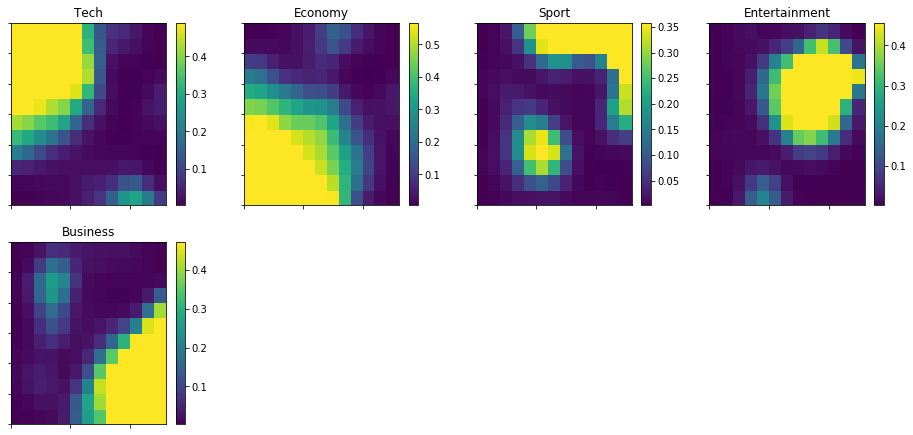

In [143]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

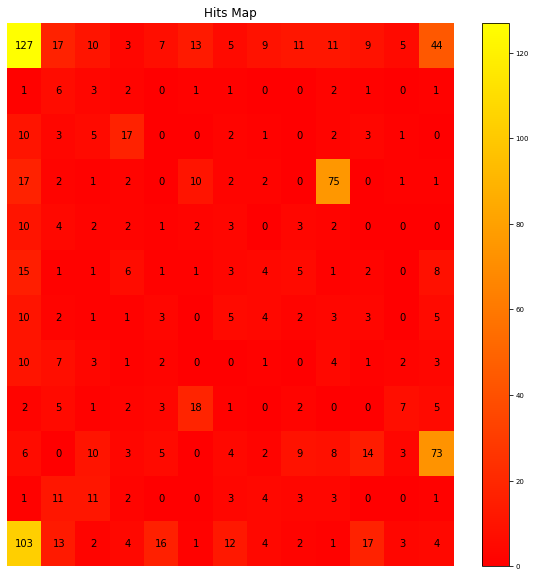

In [144]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)
plt.show()
#cmap="Greys"

/usr/local/lib/python3.6/dist-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


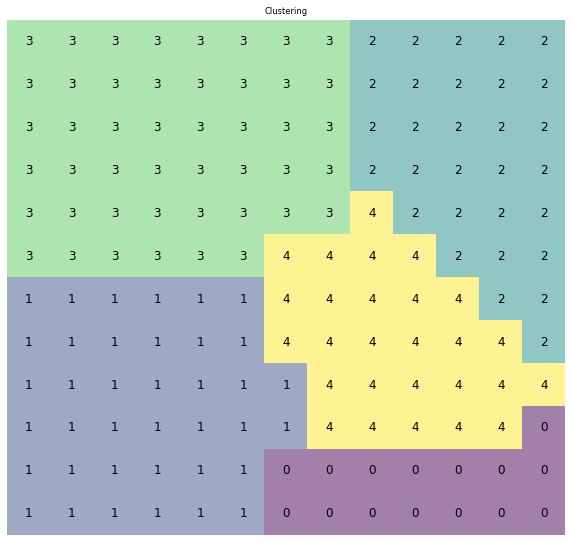

In [145]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(5)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)